<a href="https://colab.research.google.com/github/AnitaKirkovska/Machine_Learning_Class/blob/master/Exercises/Movie_Reviews_Binary_Classification_10Epochs_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [0]:
import numpy as np
test = np.zeros((len(train_data),10000))

In [0]:
import numpy as np 

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(x_train,
          y_train,
          epochs=10,
          batch_size=512,)

results=model.evaluate(x_test,y_test)

Epoch 1/10
25000/25000 [==============================] - 3s 118us/step - loss: 0.0926 - acc: 0.9679
Epoch 2/10
25000/25000 [==============================] - 3s 119us/step - loss: 0.0808 - acc: 0.9721
Epoch 3/10
25000/25000 [==============================] - 3s 120us/step - loss: 0.0706 - acc: 0.9763
Epoch 4/10
25000/25000 [==============================] - 3s 124us/step - loss: 0.0650 - acc: 0.9790
Epoch 5/10
25000/25000 [==============================] - 3s 123us/step - loss: 0.0567 - acc: 0.9817
Epoch 6/10
25000/25000 [==============================] - 3s 123us/step - loss: 0.0525 - acc: 0.9836
Epoch 7/10
25000/25000 [==============================] - 3s 118us/step - loss: 0.0445 - acc: 0.9864
Epoch 8/10
25000/25000 [==============================] - 3s 118us/step - loss: 0.0399 - acc: 0.9876
Epoch 9/10
25000/25000 [==============================] - 3s 118us/step - loss: 0.0382 - acc: 0.9878
Epoch 10/10
25000/25000 [==============================] - 2s 99us/step


In [14]:
history_dict = history.history
history_dict.keys()
[u'acc',u'loss']

['acc', 'loss']

In [15]:
results

[0.703939497461319, 0.8502]

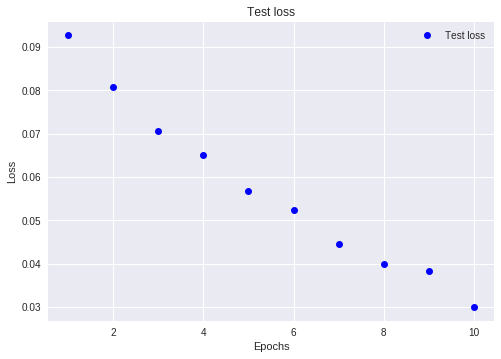

In [16]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Test loss')
plt.title('Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()